In [33]:
# # prompt: mount the ddrive

# from google.colab import drive
# drive.mount('/content/drive')


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [35]:
import pandas as pd
file_path = 'stock_data.csv'


# Define column names based on Yahoo Finance format
# columns = ["Date", "Time", "Open", "High", "Low", "Close", "Volume"]
stock_df = pd.read_csv(file_path)
stock_df=stock_df[2:]
display(stock_df.head())

Price               Close                High                 Low  \
2  2000-01-03   1455.219970703125              1478.0  1438.3599853515625   
3  2000-01-04  1399.4200439453125   1455.219970703125  1397.4300537109375   
4  2000-01-05  1402.1099853515625    1413.27001953125  1377.6800537109375   
5  2000-01-06   1403.449951171875  1411.9000244140625  1392.0999755859375   
6  2000-01-07   1441.469970703125   1441.469970703125    1400.72998046875   

                 Open      Volume  
2             1469.25   931800000  
3   1455.219970703125  1009000000  
4  1399.4200439453125  1085500000  
5  1402.1099853515625  1092300000  
6   1403.449951171875  1225200000

In [36]:
# stock_df.rename(columns={"Date_Time": "Datetime"}, inplace=True)
# stock_df["Datetime"] = pd.to_datetime(stock_df["Datetime"], format="%d/%m/%Y %H:%M:%S")
# stock_df.set_index("Datetime", inplace=True)

# Convert numeric columns to float
stock_df[["Open", "High", "Low", "Close"]] = stock_df[["Open", "High", "Low", "Close"]].astype(float)
stock_df["Volume"] = stock_df["Volume"].astype(int)

In [37]:

display(stock_df.shape)


(6289, 6)

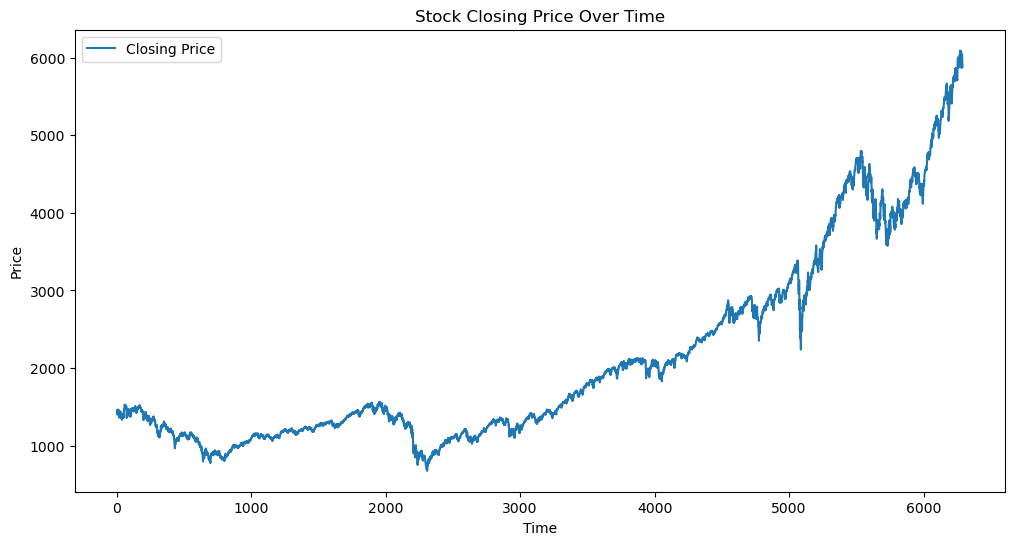

In [38]:
#  Visualizing Closing Price Trend
plt.figure(figsize=(12, 6))
plt.plot(stock_df["Close"], label='Closing Price')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [39]:
# Checking for missing values
print("Missing values:\n", stock_df.isnull().sum())



Missing values:
 Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [40]:
# Feature Engineering: Moving Averages
stock_df['MA7'] = stock_df['Close'].rolling(window=7).mean()
stock_df['MA21'] = stock_df['Close'].rolling(window=21).mean()

# Feature Engineering: Volatility
stock_df['Volatility'] = stock_df['Close'].rolling(window=10).std()


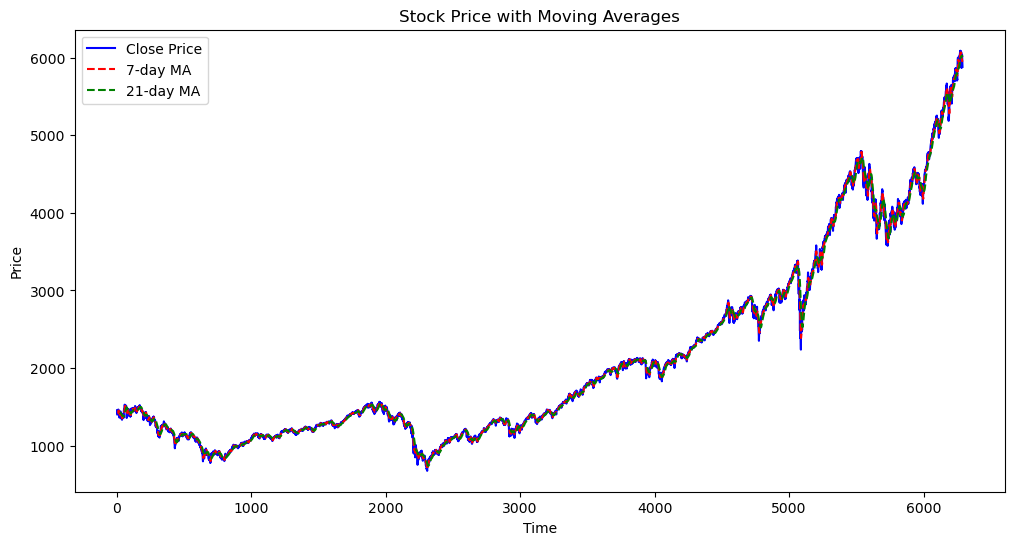

In [41]:
# Visualization of Feature Engineering
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Close'], label='Close Price', color='blue')
plt.plot(stock_df['MA7'], label='7-day MA', color='red', linestyle='dashed')
plt.plot(stock_df['MA21'], label='21-day MA', color='green', linestyle='dashed')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [42]:
def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

stock_df['RSI'] = compute_rsi(stock_df['Close'])


In [43]:
# MACD (Moving Average Convergence Divergence)
stock_df['EMA12'] = stock_df['Close'].ewm(span=12, adjust=False).mean()
stock_df['EMA26'] = stock_df['Close'].ewm(span=26, adjust=False).mean()
stock_df['MACD'] = stock_df['EMA12'] - stock_df['EMA26']
stock_df['Signal_Line'] = stock_df['MACD'].ewm(span=9, adjust=False).mean()

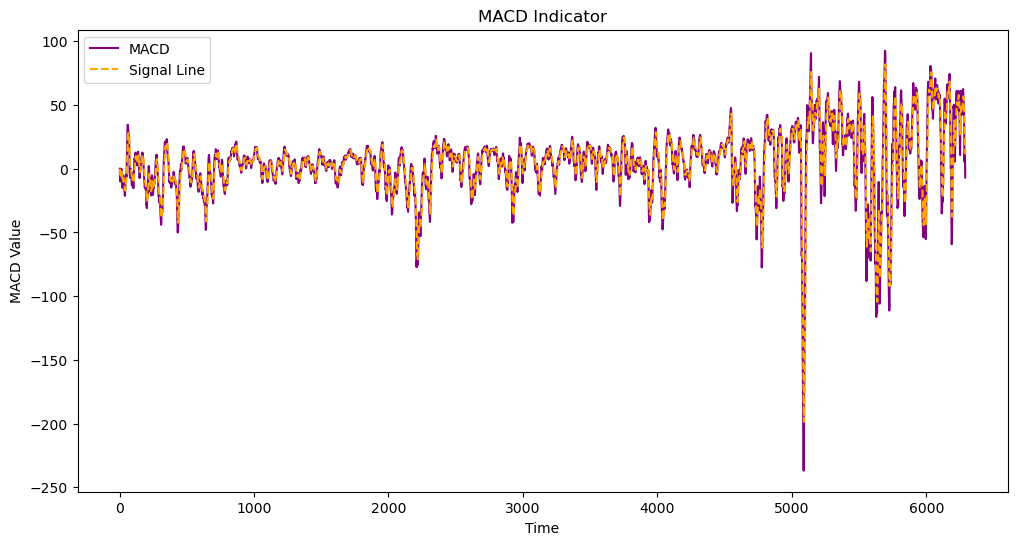

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(stock_df['MACD'], label='MACD', color='purple')
plt.plot(stock_df['Signal_Line'], label='Signal Line', color='orange', linestyle='dashed')
plt.title("MACD Indicator")
plt.xlabel("Time")
plt.ylabel("MACD Value")
plt.legend()
plt.show()

In [45]:
# Bollinger Bands
stock_df['Upper_Band'] = stock_df['MA21'] + (stock_df['Volatility'] * 2)
stock_df['Lower_Band'] = stock_df['MA21'] - (stock_df['Volatility'] * 2)


In [46]:
# Stochastic Oscillator
stock_df['L14'] = stock_df['Low'].rolling(window=14).min()
stock_df['H14'] = stock_df['High'].rolling(window=14).max()
stock_df['%K'] = (stock_df['Close'] - stock_df['L14']) / (stock_df['H14'] - stock_df['L14']) * 100
stock_df['%D'] = stock_df['%K'].rolling(window=3).mean()

In [47]:
# Lagged Returns
stock_df['Lagged_Return'] = stock_df['Close'].shift(1)


In [48]:
# # Time-Based Features
# stock_df['Day_of_Week'] = stock_df.index.dayofweek
# stock_df['Hour_of_Day'] = stock_df.index.hour

In [49]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
stock_df[['PCA1', 'PCA2', 'PCA3']] = pca.fit_transform(stock_df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna())


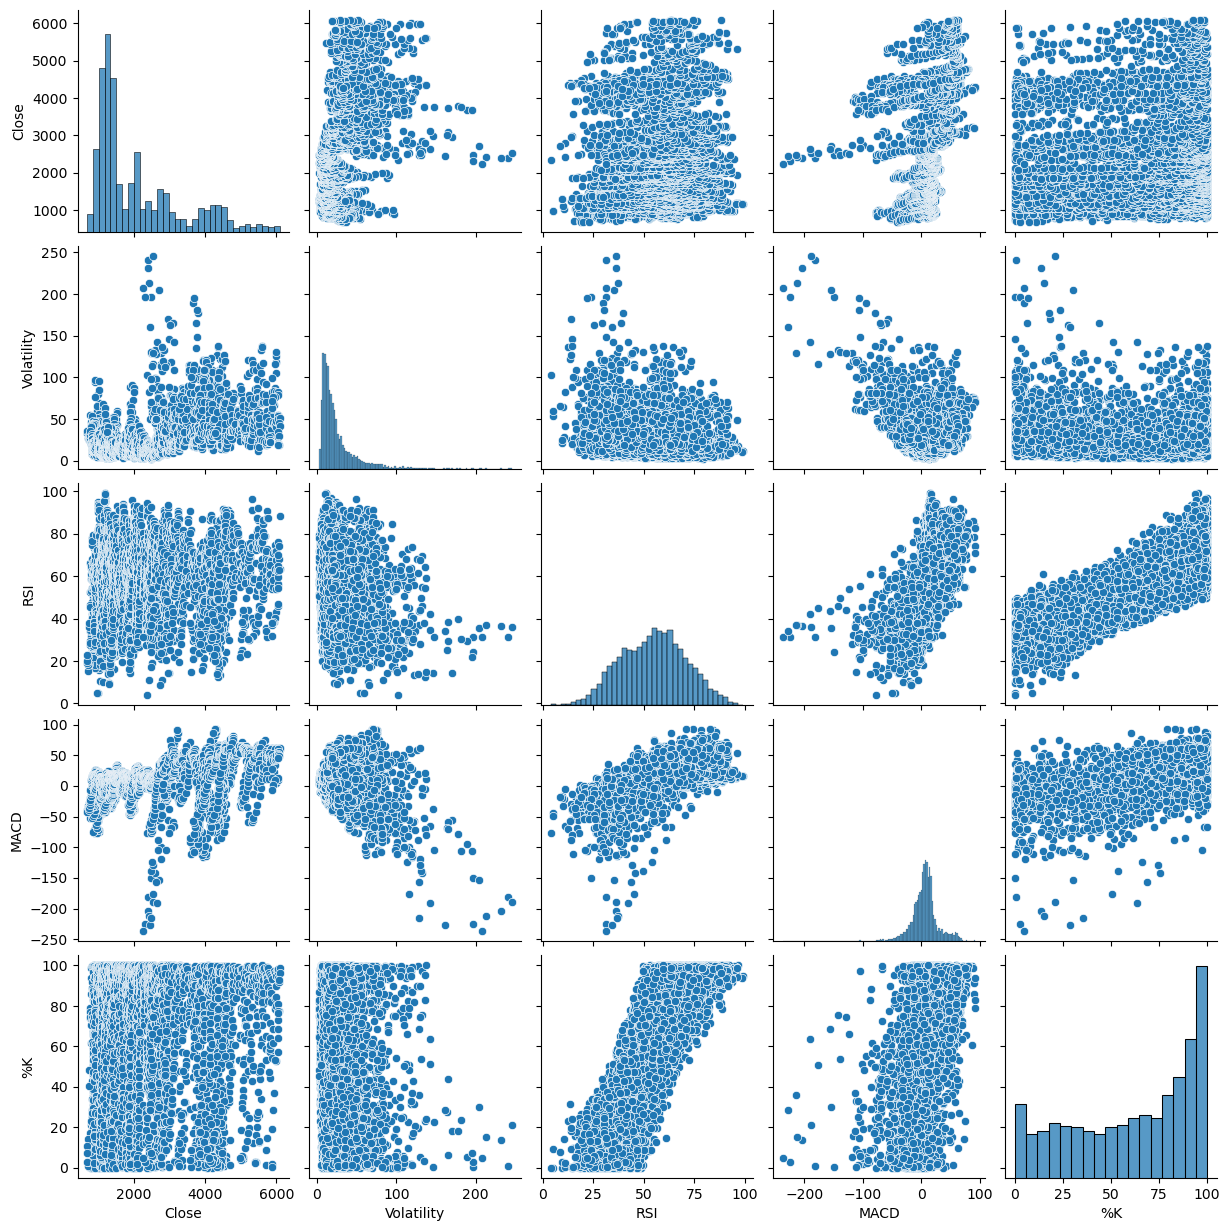

        Price        Close         High          Low         Open      Volume  \
2  2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000   
3  2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000   
4  2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000   
5  2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000   
6  2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000   

   MA7  MA21  Volatility  RSI  ...  Upper_Band  Lower_Band  L14  H14  %K  %D  \
2  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
3  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
4  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
5  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
6  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   

   Lagged_Return          PCA1  

In [50]:
sns.pairplot(stock_df[['Close', 'Volatility', 'RSI', 'MACD', '%K']].dropna())
plt.show()

print(stock_df.head())

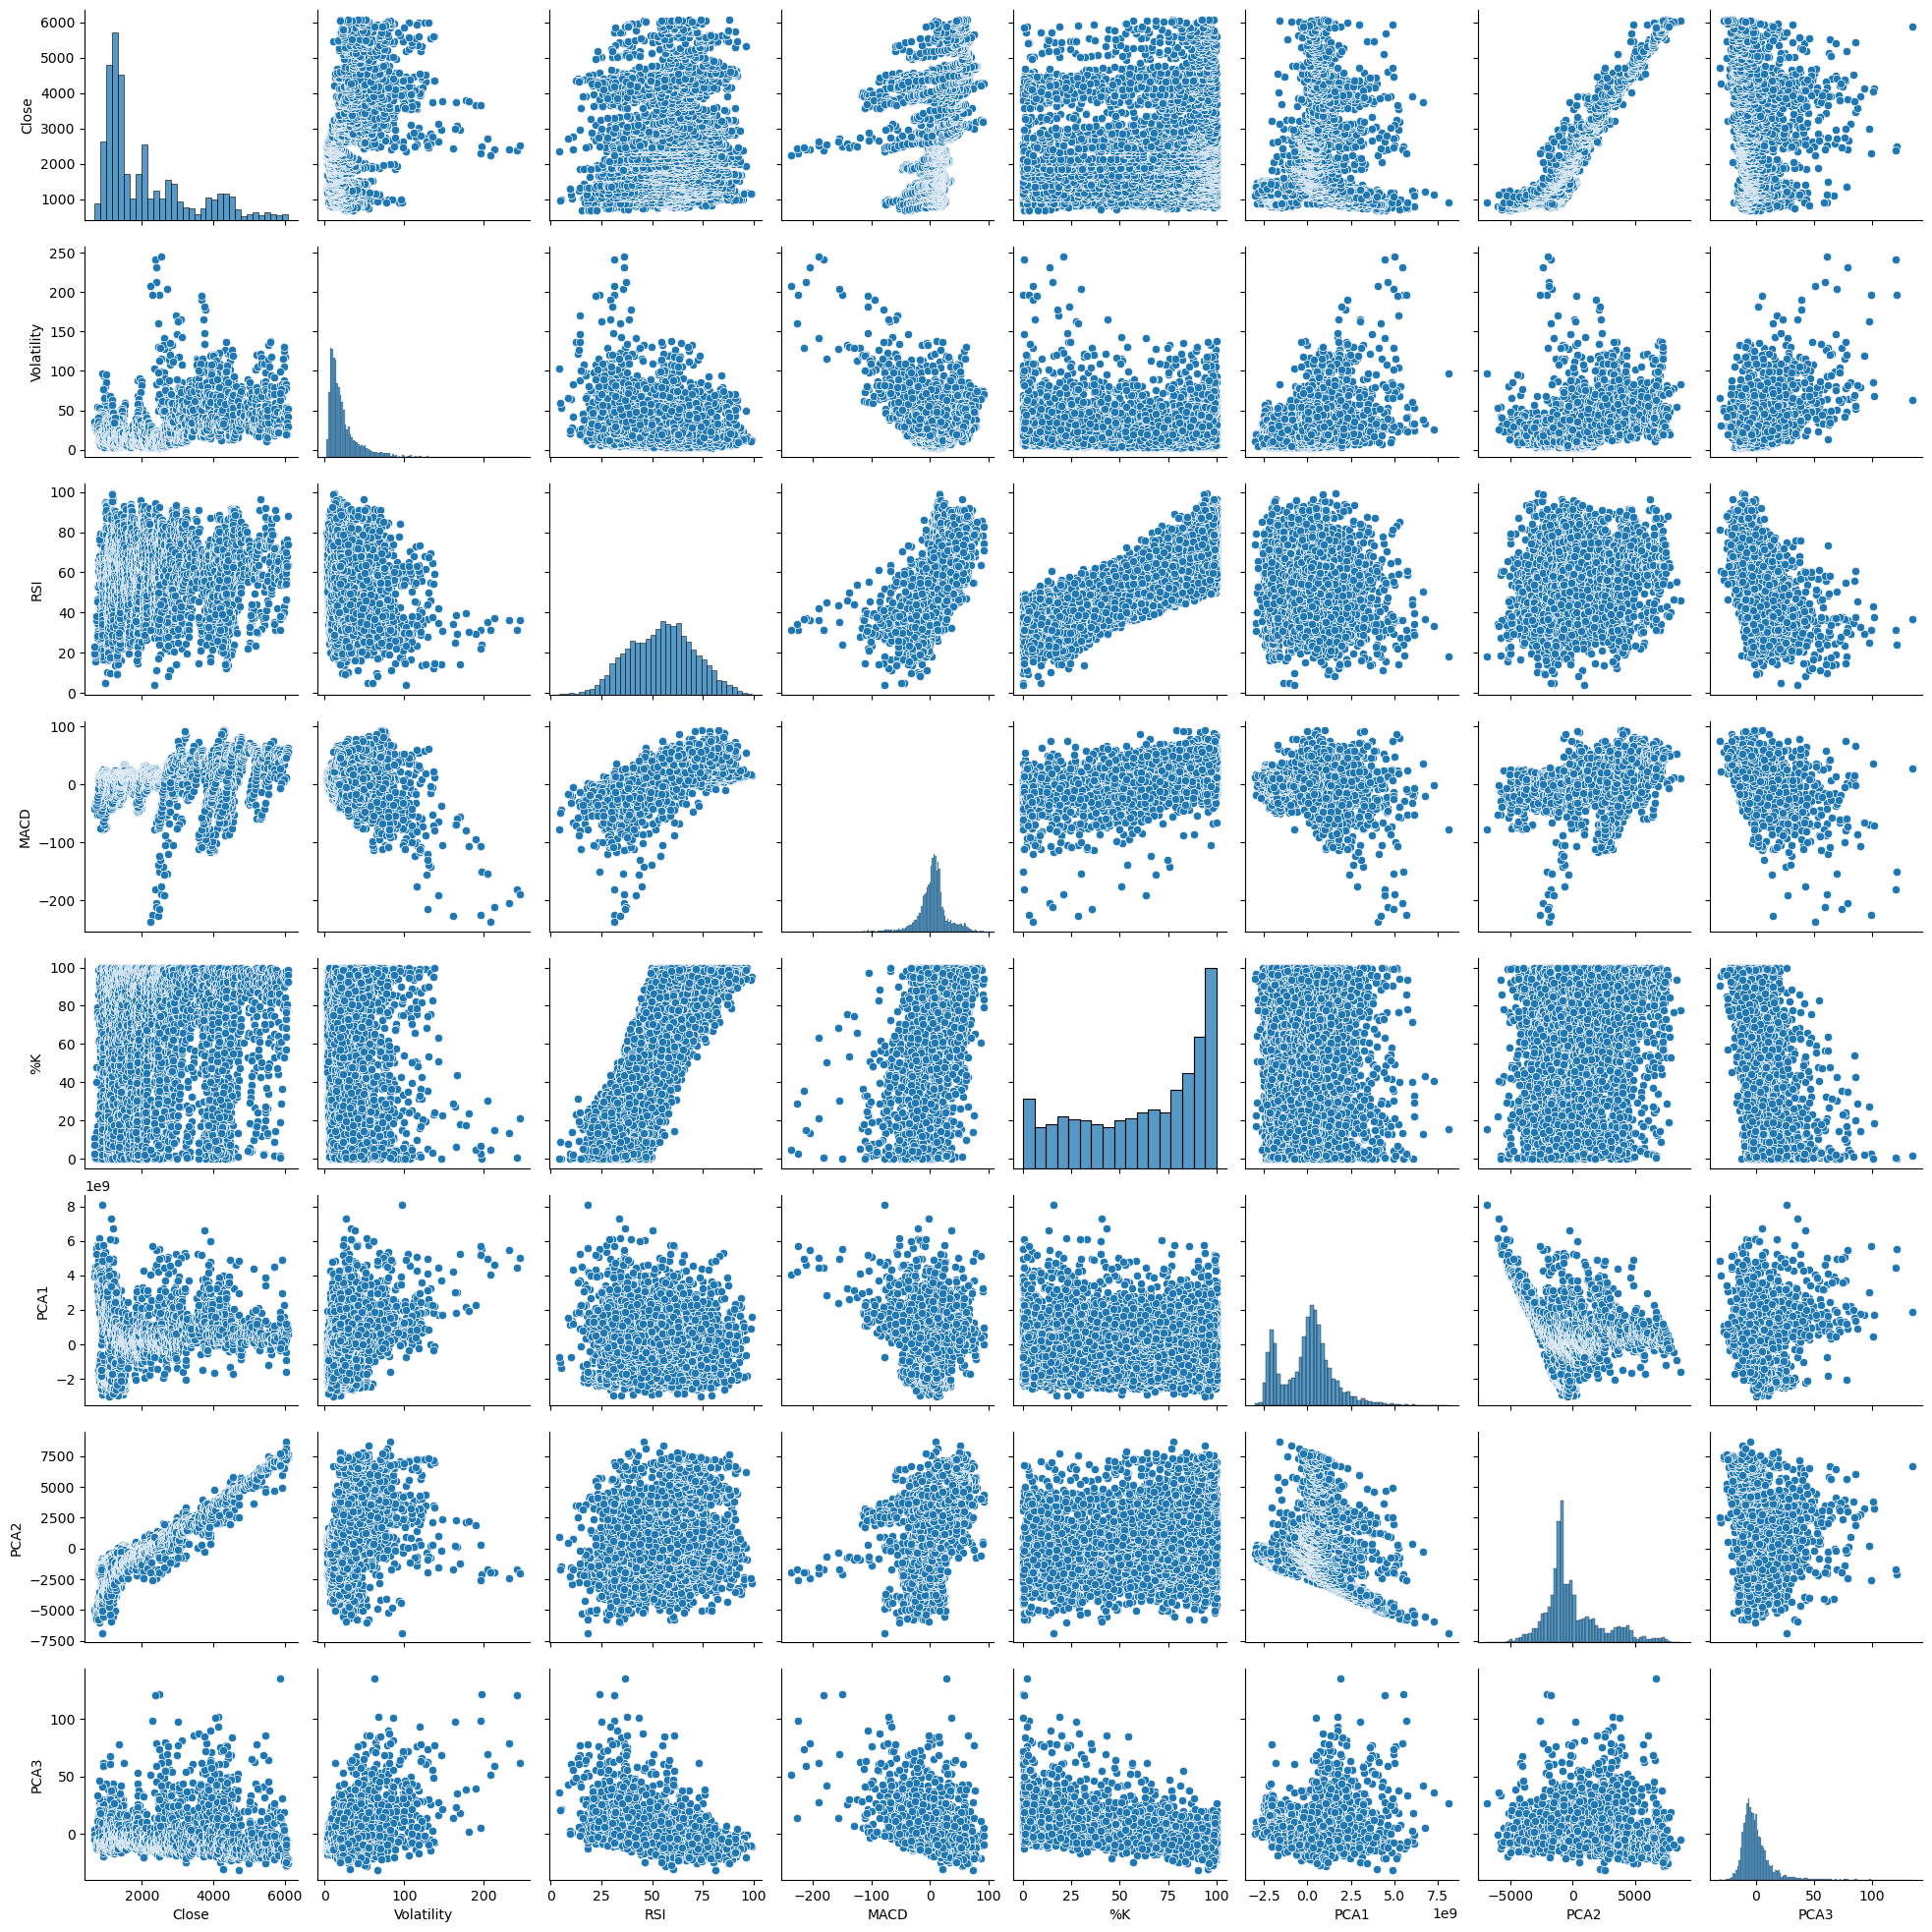

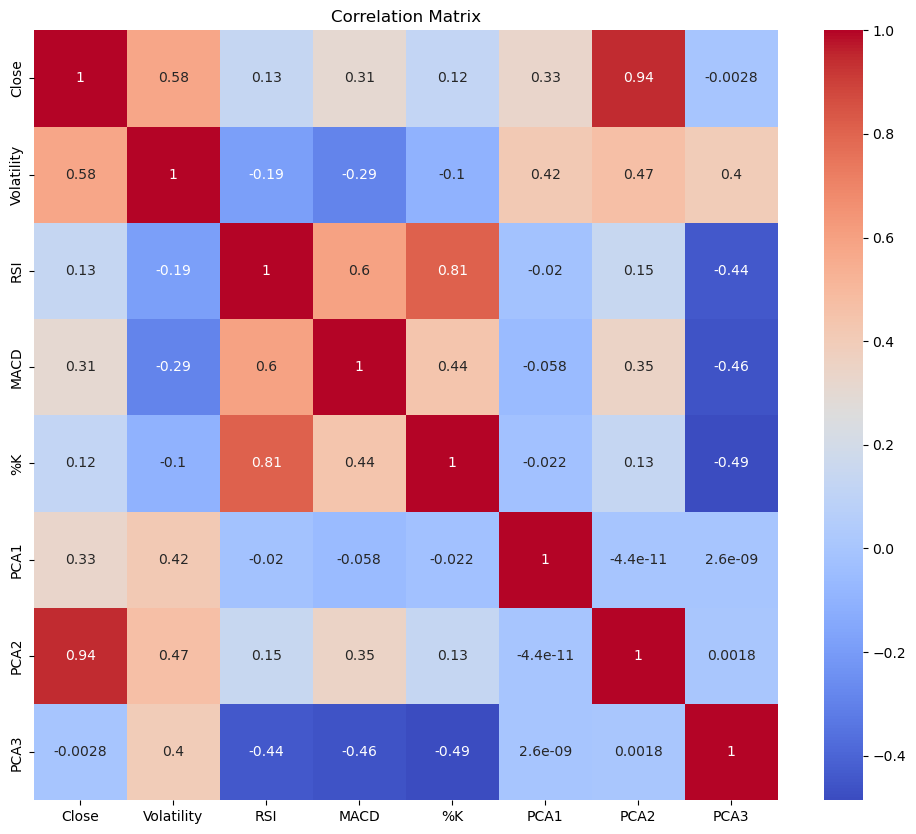

In [51]:

# 1. Pairplot for selected features:
sns.pairplot(stock_df[['Close', 'Volatility', 'RSI', 'MACD', '%K', 'PCA1', 'PCA2', 'PCA3']].dropna())
plt.show()

# 2. Correlation heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(stock_df[['Close', 'Volatility', 'RSI', 'MACD', '%K', 'PCA1', 'PCA2', 'PCA3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


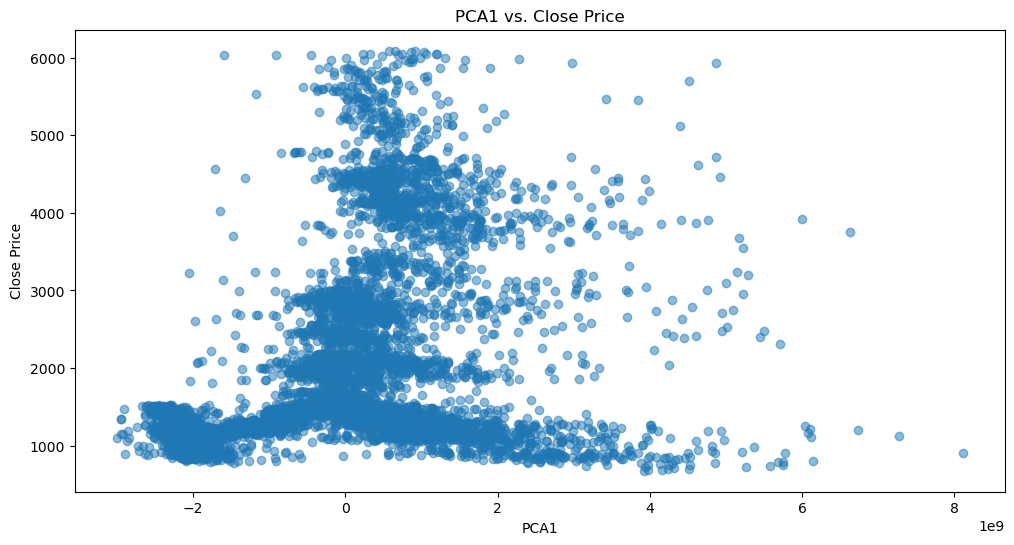

In [52]:
# 3. Scatter plots for PCA components vs. Close price:
plt.figure(figsize=(12, 6))
plt.scatter(stock_df['PCA1'], stock_df['Close'], alpha=0.5)
plt.title("PCA1 vs. Close Price")
plt.xlabel("PCA1")
plt.ylabel("Close Price")
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(stock_df['PCA2'], stock_df['Close'], alpha=0.5)
plt.title("PCA2 vs. Close Price")
plt.xlabel("PCA2")
plt.ylabel("Close Price")
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(stock_df['PCA3'], stock_df['Close'], alpha=0.5)
plt.title("PCA3 vs. Close Price")
plt.xlabel("PCA3")
plt.ylabel("Close Price")
plt.show()

In [53]:
stock_df.head()

Price        Close         High          Low         Open      Volume  \
2  2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000   
3  2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000   
4  2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000   
5  2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000   
6  2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000   

   MA7  MA21  Volatility  RSI  ...  Upper_Band  Lower_Band  L14  H14  %K  %D  \
2  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
3  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
4  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
5  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   
6  NaN   NaN         NaN  NaN  ...         NaN         NaN  NaN  NaN NaN NaN   

   Lagged_Return          PCA1        PCA2       PCA3  
2            NaN -2.419307e+09   17.398397  22.850873  
3    1455.219971 -2.342107e+09  -91.466588  45.058224  
4    1399.420044 -2.265607e+09 -190.648077  15.859179  
5    1402.109985 -2.258807e+09 -185.848656   6.577511  
6    1403.449951 -2.125907e+09 -219.541901  11.029623  

[5 rows x 24 columns]

#Model training - Arima

In [54]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [55]:
scaler = MinMaxScaler()
stock_df[['Close']] = scaler.fit_transform(stock_df[['Close']])


In [ ]:
# Train-Test Split using sklearn's train_test_split
train_arima, test_arima = train_test_split(stock_df['Close'], test_size=0.2, shuffle=False)

arima_model = ARIMA(train_arima, order=(5,1,0))
arima_result = arima_model.fit()
print(arima_result.summary())

test_predictions = arima_result.forecast(steps=len(test_arima))




/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(5, 1, 0)   Log Likelihood                5671.521
Date:                Wed, 19 Feb 2025   AIC                         -11331.041
Time:                        22:54:03   BIC                         -11300.227
Sample:                             0   HQIC                        -11319.460
                               - 1257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0209      0.023     -0.902      0.367      -0.066       0.024
ar.L2         -0.0654      0.021     -3.056      0.002      -0.107      -0.023
ar.L3         -0.0164      0.023     -0.728      0.4

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


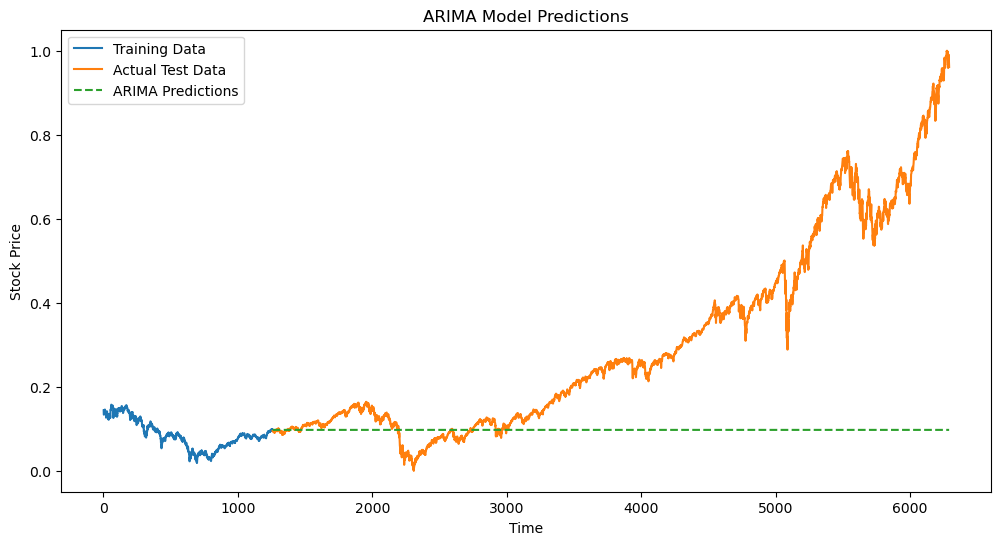

In [57]:
plt.figure(figsize=(12,6))
plt.plot(train_arima, label='Training Data')
plt.plot(test_arima, label='Actual Test Data')
plt.plot(test_arima.index, test_predictions, label='ARIMA Predictions', linestyle='dashed')
plt.legend()
plt.title("ARIMA Model Predictions")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

LSTM - Model training

In [61]:
!pip install tensorflow -q
!pip install scikeras -q



In [62]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam



In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_df['Close'].values.reshape(-1, 1))


In [64]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(scaled_data, seq_length)


In [78]:
# Spliting the  data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:


def build_model(neurons=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(neurons, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = KerasRegressor(model=build_model, verbose=0)  # Use 'model' instead of 'build_fn'


In [81]:
model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [82]:
param_grid = {
    'model__neurons': [50, 100], 
    'model__learning_rate': [0.001, 0.01],
}
# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, batch_size=32, epochs=20) 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim`

In [83]:
print(f"Best parameters: {grid_result.best_params_}")


Best parameters: {'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__neurons': 50}


In [85]:
best_model = grid_result.best_estimator_.model
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

AttributeError: 'function' object has no attribute 'evaluate'